In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('../../Datasets/class_exercise/snsdata1.csv')
df.head()

,grad year,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2022,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2022,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2022,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2022,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   grad year     4566 non-null   int64  
 1   gender        4131 non-null   object 
 2   age           3840 non-null   float64
 3   friends       4566 non-null   int64  
 4   basketball    4566 non-null   int64  
 5   football      4566 non-null   int64  
 6   soccer        4566 non-null   int64  
 7   softball      4566 non-null   int64  
 8   volleyball    4566 non-null   int64  
 9   swimming      4566 non-null   int64  
 10  cheerleading  4566 non-null   int64  
 11  baseball      4566 non-null   int64  
 12  tennis        4566 non-null   int64  
 13  sports        4566 non-null   int64  
 14  cute          4566 non-null   int64  
 15  sex           4566 non-null   int64  
 16  sexy          4566 non-null   int64  
 17  hot           4566 non-null   int64  
 18  kissed        4566 non-null 

In [4]:
df.shape

(4566, 40)

In [5]:
df["gender"].value_counts(dropna=False)

gender
F      3171
M       960
NaN     435
Name: count, dtype: int64

In [6]:
df["gender"].fillna("Unknown",inplace=True)
df["gender"].value_counts(dropna=False)

gender
F          3171
M           960
Unknown     435
Name: count, dtype: int64

In [7]:
df["grad year"].value_counts()

grad year
2022    4566
Name: count, dtype: int64

In [8]:
df.drop("grad year",axis=1,inplace=True)

In [9]:
df["age"].isnull().sum()

726

In [10]:
df["age"].describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99])

count    3840.000000
mean       19.149429
std         6.388005
min         5.194000
1%         15.520980
2%         17.589480
3%         17.871360
4%         17.982000
5%         18.039850
25%        18.379000
50%        18.678000
75%        18.987750
90%        19.231000
95%        19.433000
96%        19.510000
97%        19.598640
98%        19.830660
99%        20.370490
max       106.927000
Name: age, dtype: float64

In [11]:
df["age"].fillna(df["age"].mean(),inplace=True)  # filling mean at missing points

In [12]:
# df["age"].describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99])

In [13]:
df["age"]=np.where(df["age"]<16,16,df["age"])
df["age"]=np.where(df["age"]>21,21,df["age"])

In [14]:
df["age"].describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99])

count    4566.000000
mean       18.759504
std         0.541142
min        16.000000
1%         16.924300
2%         17.725000
3%         17.954850
4%         18.026000
5%         18.073000
25%        18.431000
50%        18.795000
75%        19.149429
90%        19.187000
95%        19.372250
96%        19.455000
97%        19.540150
98%        19.728700
99%        20.149450
max        21.000000
Name: age, dtype: float64

In [15]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,0.25,0.5,0.75,0.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,4566.0,18.759504,0.541142,16.0,16.9243,17.725,17.95485,18.026,18.073,18.431,18.795,19.149429,19.187,19.37225,19.455,19.54015,19.7287,20.14945,21.0
friends,4566.0,26.120456,32.065369,0.0,0.0000,0.000,0.00000,0.000,0.000,2.000,16.000,38.000000,65.000,87.00000,93.400,103.00000,118.0000,145.00000,373.0
basketball,4566.0,0.211345,0.759756,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,1.000,1.00000,1.000,2.00000,2.0000,3.00000,22.0
football,4566.0,0.228866,0.686250,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,1.000,1.00000,2.000,2.00000,2.0000,3.00000,10.0
soccer,4566.0,0.150898,0.699715,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,2.00000,2.0000,3.00000,14.0
softball,4566.0,0.105125,0.596364,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,2.0000,3.00000,12.0
volleyball,4566.0,0.091108,0.493573,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.00000,11.0
swimming,4566.0,0.101183,0.399686,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.00000,7.0
cheerleading,4566.0,0.073587,0.440371,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,0.00000,1.000,1.00000,1.0000,2.00000,9.0
baseball,4566.0,0.098774,0.583162,0.0,0.0000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000000,0.000,1.00000,1.000,1.00000,1.0000,2.00000,16.0


In [16]:
num_data=df.select_dtypes(include=np.number)

In [17]:
num_data.columns

Index(['age', 'friends', 'basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [18]:
X=num_data[['basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs']]

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std=StandardScaler().fit(X)
X_std=pd.DataFrame(std.transform(X), columns=X.columns)

In [20]:
X_std.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.278205,-0.333538,-0.21568,-0.176296,-0.184609,-0.253183,-0.167121,-0.169395,-0.16454,-0.278386,-0.381664,-0.115618,-0.263055,-0.226992,-0.195217,0.573493,-0.253211,-0.157464,-0.597379,-0.322677,-0.278250,-0.227661,-0.204046,-0.110635,-0.357135,-0.267097,-0.169122,-0.306341,-0.469296,-0.289083,-0.160355,-0.146563,-0.291602,-0.252152,-0.237169,-0.139816
1,-0.278205,1.123817,-0.21568,-0.176296,-0.184609,-0.253183,-0.167121,-0.169395,-0.16454,-0.278386,0.956797,-0.115618,-0.263055,-0.226992,-0.195217,-0.318390,-0.253211,-0.157464,1.088427,2.955060,0.295334,-0.227661,-0.204046,-0.110635,6.271635,7.427326,-0.169122,1.418386,-0.469296,-0.289083,-0.160355,-0.146563,-0.291602,-0.252152,-0.237169,-0.139816
2,-0.278205,1.123817,-0.21568,-0.176296,-0.184609,-0.253183,-0.167121,-0.169395,-0.16454,-0.278386,-0.381664,-0.115618,-0.263055,-0.226992,-0.195217,-0.318390,1.550470,-0.157464,0.245524,-0.322677,-0.278250,-0.227661,-0.204046,-0.110635,-0.357135,-0.267097,-0.169122,-0.306341,-0.469296,-0.289083,-0.160355,-0.146563,-0.291602,1.916067,-0.237169,-0.139816
3,-0.278205,-0.333538,-0.21568,-0.176296,-0.184609,-0.253183,-0.167121,-0.169395,-0.16454,-0.278386,0.956797,-0.115618,-0.263055,-0.226992,-0.195217,-0.318390,-0.253211,-0.157464,-0.597379,1.316191,-0.278250,-0.227661,-0.204046,-0.110635,-0.357135,-0.267097,-0.169122,-0.306341,-0.469296,-0.289083,-0.160355,-0.146563,-0.291602,-0.252152,-0.237169,-0.139816
4,-0.278205,-0.333538,-0.21568,-0.176296,-0.184609,-0.253183,-0.167121,-0.169395,-0.16454,-0.278386,-0.381664,0.425830,-0.263055,-0.226992,12.502215,0.573493,0.648630,-0.157464,1.931329,-0.322677,0.295334,-0.227661,-0.204046,-0.110635,0.747660,-0.267097,-0.169122,-0.306341,2.572303,-0.289083,-0.160355,-0.146563,-0.291602,-0.252152,2.047457,2.647964


### PCA

In [21]:
X_std.shape

(4566, 36)

In [69]:
from sklearn.decomposition import PCA

# create instance for pca
sklearn_pca = PCA()
# fit and transform the instance on datad
sklearn_pca_fit=sklearn_pca.fit(X_std)
pca_result=sklearn_pca_fit.transform(X_std)

In [70]:
pd.DataFrame(pca_result).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.334227,-0.210477,0.049784,-0.242472,0.252081,0.047110,-0.020941,-0.027719,-0.123805,0.336870,0.117249,-0.032025
1,3.680004,-0.396397,-0.131743,-0.938950,-0.436107,-3.204936,1.932569,0.948587,-2.558222,-0.843793,1.359135,2.916872
2,-0.605214,1.052838,-0.853718,-0.062342,0.085853,0.477347,0.012077,-0.282032,-0.467607,0.543895,-0.035702,0.365805
3,-0.906712,-0.176053,-0.031559,-0.246402,0.202823,-0.191968,0.579600,0.062098,-0.313212,0.044993,-0.021603,-0.293859
4,5.185260,1.019246,-0.319473,-1.867784,4.796374,-0.595811,-1.740424,2.276674,2.356655,-0.479397,-1.193191,0.562226


In [71]:
pd.DataFrame({"Variance":sklearn_pca_fit.explained_variance_}).head(10)

,Variance
0,2.963009
1,1.669595
2,1.590433
3,1.531374
4,1.471744
5,1.293281
6,1.099803
7,1.070065
8,1.050910
9,1.039219


In [72]:
Eigen=pd.DataFrame({"Eigen_Value":sklearn_pca_fit.explained_variance_  ,
                    "Cumm_variance":sklearn_pca_fit.explained_variance_ratio_.cumsum()})
Eigen.head(10)

,Eigen_Value,Cumm_variance
0,2.963009,0.176374
1,1.669595,0.275758
2,1.590433,0.370429
3,1.531374,0.461584
4,1.471744,0.549190
5,1.293281,0.626173
6,1.099803,0.691640
7,1.070065,0.755336
8,1.050910,0.817891
9,1.039219,0.879751


In [73]:
n_Comp = Eigen[Eigen["Eigen_Value"]>=1]
n_Comp

,Eigen_Value,Cumm_variance
0,2.963009,0.176374
1,1.669595,0.275758
2,1.590433,0.370429
3,1.531374,0.461584
4,1.471744,0.549190
5,1.293281,0.626173
6,1.099803,0.691640
7,1.070065,0.755336
8,1.050910,0.817891
9,1.039219,0.879751


In [74]:
n_Comp.shape[0]

12

In [75]:
pcs103=PCA(n_components = n_Comp.shape[0])
pcs103_fit=pcs103.fit(X_std)
X_std=pcs103_fit.transform(X_std)

In [76]:
pca_cols = [f'PC{n}' for n in range(n_Comp.shape[0])]

x_pcs_reg=pd.DataFrame(X_std,columns=pca_cols)
x_pcs_reg.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.334227,-0.210477,0.049784,-0.242472,0.252081,0.047110,-0.020941,-0.027719,-0.123805,0.336870,0.117249,-0.032025
1,3.680004,-0.396397,-0.131743,-0.938950,-0.436107,-3.204936,1.932569,0.948587,-2.558222,-0.843793,1.359135,2.916872
2,-0.605214,1.052838,-0.853718,-0.062342,0.085853,0.477347,0.012077,-0.282032,-0.467607,0.543895,-0.035702,0.365805
3,-0.906712,-0.176053,-0.031559,-0.246402,0.202823,-0.191968,0.579600,0.062098,-0.313212,0.044993,-0.021603,-0.293859
4,5.185260,1.019246,-0.319473,-1.867784,4.796374,-0.595811,-1.740424,2.276674,2.356655,-0.479397,-1.193191,0.562226


In [77]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3,random_state=100)
km.fit(x_pcs_reg)

KMeans(n_clusters=3, random_state=100)

In [78]:
km.inertia_

64684.280056247146

In [79]:
km.cluster_centers_[0]

array([ 4.12226837, -4.03680283, -0.15710131, -0.23089375, -1.54426611,
        5.11593393, -0.09800991, -0.30613638,  0.13866281,  0.78145649,
        0.28011536,  0.67671142])

In [80]:
km.labels_

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

In [81]:
df_copy=df.copy()

In [82]:
df_copy["cluster"]=km.labels_  # adding clusters to origional data set

In [83]:
df_copy.head(20)

,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,M,18.982000,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,F,18.801000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,2
2,M,18.335000,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,F,18.875000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Unknown,18.995000,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,2
5,F,19.149429,142,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
6,F,18.930000,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0
7,M,18.322000,17,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,F,19.055000,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,F,18.708000,39,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,6,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,2


In [84]:
df_copy["cluster"].value_counts()

cluster
1    3662
2     821
0      83
Name: count, dtype: int64

In [85]:
num=df_copy.select_dtypes(include=np.number)

In [86]:
clust_summary=num.groupby("cluster").mean().T.reset_index()
clust_summary.columns=["Features", "cluster0", "clutser1", "cluster2"]
clust_summary


,Features,cluster0,clutser1,cluster2
0,age,18.724088,18.775294,18.692654
1,friends,35.975904,25.146641,29.467722
2,basketball,0.349398,0.138449,0.522533
3,football,0.337349,0.164118,0.506699
4,soccer,0.289157,0.110049,0.319123
5,softball,0.216867,0.065265,0.271620
6,volleyball,0.168675,0.058711,0.227771
7,swimming,0.240964,0.076188,0.198538
8,cheerleading,0.240964,0.042600,0.194884
9,baseball,0.120482,0.074823,0.203410


In [87]:
overall=num.describe().T["mean"].reset_index()
overall.columns=["Features", "overall"]
overall

,Features,overall
0,age,18.759504
1,friends,26.120456
2,basketball,0.211345
3,football,0.228866
4,soccer,0.150898
5,softball,0.105125
6,volleyball,0.091108
7,swimming,0.101183
8,cheerleading,0.073587
9,baseball,0.098774


In [88]:
final_summary=pd.merge(overall, clust_summary, on="Features", how="inner")
final_summary.to_excel("cluster_summary0.xlsx")

In [89]:
# ELbow curve to get no of cluster
wcss=[]
no_clusters=[]
for i in range(2, 21):
  km=KMeans(n_clusters=i, random_state=100)
  km.fit(x_pcs_reg)
  wcss.append(km.inertia_)
  no_clusters.append(i)
  print("Cluster:", i, "WCSS:", km.inertia_)

Cluster: 2 WCSS: 69163.1314366656
Cluster: 3 WCSS: 64684.280056247146
Cluster: 4 WCSS: 60289.42251311244
Cluster: 5 WCSS: 56490.543002025115
Cluster: 6 WCSS: 53165.75388874934
Cluster: 7 WCSS: 49568.145016397866
Cluster: 8 WCSS: 47583.036789332065
Cluster: 9 WCSS: 46011.88815835098
Cluster: 10 WCSS: 44429.30597067831
Cluster: 11 WCSS: 42746.50034314697
Cluster: 12 WCSS: 41360.607507073204
Cluster: 13 WCSS: 40136.71900542867
Cluster: 14 WCSS: 38625.63628730244
Cluster: 15 WCSS: 37882.67277139856
Cluster: 16 WCSS: 36669.99980537752
Cluster: 17 WCSS: 35547.79677484307
Cluster: 18 WCSS: 34999.72987374682
Cluster: 19 WCSS: 34302.33022344122
Cluster: 20 WCSS: 33406.28710178338


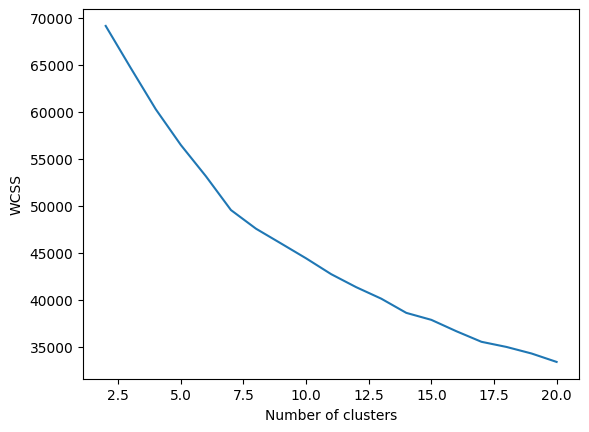

In [90]:
plt.plot(no_clusters, wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [91]:
# Based on Elbow curve , we are creating 7 clusters

In [92]:
# silhaoutte score
from sklearn.metrics import silhouette_score

In [96]:
km6=KMeans(n_clusters=7, random_state=100)
km6.fit(X_std)

KMeans(n_clusters=7, random_state=100)

In [97]:
df_copy=df.copy()
df_copy["cluster"]=km6.labels_

In [98]:
df_copy["cluster"].value_counts()

cluster
1    3211
0     664
6     333
4     134
5      85
3      78
2      61
Name: count, dtype: int64

In [99]:
num=df_copy.select_dtypes(include=np.number)

In [101]:
clust_summary=num.groupby("cluster").mean().T.reset_index()
clust_summary.columns=["Features", "cluster0", "clutser1", "cluster2", "cluster3", "cluster4", "cluster5", "cluster6"]
# clust_summary

In [102]:
a=df_copy.describe().T["mean"].reset_index()
a.columns=["Features", "overall"]
# a

In [103]:
final_6=pd.merge(a, clust_summary, on="Features", how="inner")
final_6.to_excel("cluster_summary6.xlsx")